In [1]:
#!pip install catboost

In [2]:
#http://drivendata.co/blog/worldbank-poverty-benchmark/

%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# data directory
DATA_DIR = os.path.join(r'C:\Users\piush\Desktop\Dataset\world_bank_poverty_data\household')

In [3]:
data_paths = {'A': {'train': os.path.join(DATA_DIR,  'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR,  'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR,  'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR,  'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR,  'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR,  'C_hhold_test.csv')}}

In [4]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

In [5]:
a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [6]:
b_train.head()

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,YVMuyCUV,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country
id,,,,,,,,,,,,,,,,,,,,,
57071,zTghO,pYfmQ,lNhMv,42,RQnVj,103,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,pdvWY,LLuZj,qpzpO,kZRgh,VwGOP,DScEf,SKBnS,Enull,B
18973,zTghO,pYfmQ,lNhMv,34,iuxWN,-2,OLVWN,FDqwJ,ufugi,IbWRL,...,nZcTi,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
20151,zTghO,pYfmQ,lNhMv,34,iuxWN,313,OMRWa,FDqwJ,rxJJI,IbWRL,...,nZcTi,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
5730,zTghO,pYfmQ,lNhMv,58,iuxWN,138,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,XrijK,lmjln,ZZzXr,kZRgh,VwGOP,ZwQQe,SKBnS,Enull,B
35033,zTghO,pYfmQ,lNhMv,122,iuxWN,68,OLVWN,FDqwJ,rxJJI,IbWRL,...,nZcTi,CRHYU,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,SKBnS,Enull,B


In [7]:
c_train.head()

,GRGAYimk,DNnBfiSI,cNDTCUPU,GvTJUYOo,vmKoAlVH,LhUIIEHQ,DTNyjXJp,PNAiwXUz,ABnhybHK,yiuxBjHP,...,AJHrHUkH,PaEKIlvv,bFEsoTgJ,ihACfisf,obIQUcpS,lAvdypjD,ARWytYMz,eqJPmiPb,mmoCpqWS,country
id,,,,,,,,,,,,,,,,,,,,,
57211,RslOh,SuNUt,gJLrc,EPKkJ,qKiiE,7,XuMYE,-5,QqETe,umyco,...,laFxs,kBQRJ,qcUVH,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,52,C
62519,jPUAt,boDkI,gJLrc,EPKkJ,YXkKd,7,XuMYE,331,sEJgr,yYwlq,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,NwjRA,wnPqZ,100,C
11614,OpTiw,boDkI,vURog,EPKkJ,qKiiE,9,XuMYE,-1,sEJgr,umyco,...,laFxs,oUXSJ,eusFW,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,70,C
6470,RslOh,VgxgY,gJLrc,EPKkJ,YXkKd,9,zfhKi,-5,sEJgr,umyco,...,laFxs,kBQRJ,jqrBN,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,10,C
33558,IXFlv,VgxgY,kPTaD,EPKkJ,YXkKd,9,XuMYE,23,sEJgr,umyco,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,herus,wnPqZ,-5,C


The first thing to notice is that each country's surveys have wildly different numbers of columns, so we'll plan on training separate models for each country and combining our predictions for submission at the end.

##### Poverty Distribution


Let's take a look at the class distributions for each country. In classification tasks, it's crucial to know the balance of class labels!

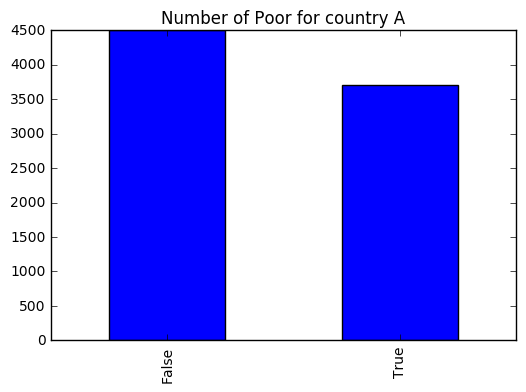

In [8]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A');

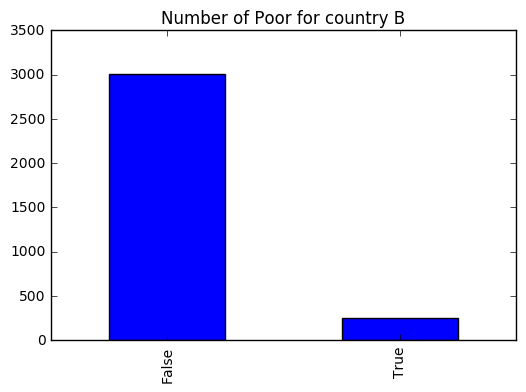

In [9]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B');

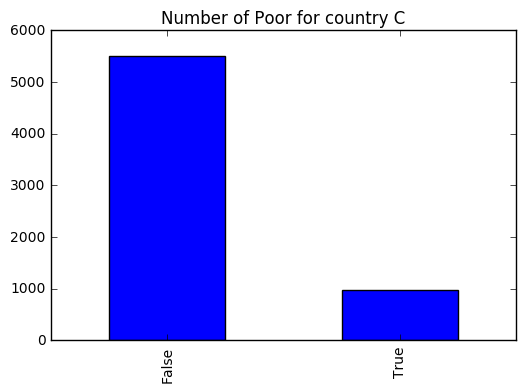

In [10]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

Country A is well-balanced, but countries B and C are quite unbalanced. This could definitely impact the confidence of our predictor. But solving that problem is up to you – it's outside the scope of this humble benchmark.

We expect most of the data types here to be the dreaded object type, but let's make sure.

In [11]:
a_train.info()
print("*" * 60)
b_train.info()
print("*" * 60)
c_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


Sure enough, the bool types are our labels--the poor column--then there are a few numeric types with the rest being object. We'll need to convert the object columns to categorical variables before training anything.

<b>Pre-process the Data</b>

We're going to do some simple pre-processing here. Standardizing the data and converting the object types to categoricals should get us pretty far. Let's write a couple of simple functions to help this effort.

In [12]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
    

def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        

    df = standardize(df)
    print("After standardization {}".format(df.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    
    return df

##### Time to convert these surveys!

In [13]:
print("Country A")
aX_train = pre_process_data(a_train.drop('poor', axis=1))
ay_train = np.ravel(a_train.poor)

print("\nCountry B")
bX_train = pre_process_data(b_train.drop('poor', axis=1))
by_train = np.ravel(b_train.poor)

print("\nCountry C")
cX_train = pre_process_data(c_train.drop('poor', axis=1))
cy_train = np.ravel(c_train.poor)

Country A
Input shape:	(8203, 344)
After standardization (8203, 344)
After converting categoricals:	(8203, 859)

Country B
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)

Country C
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)


###### The data is probably looking pretty different now. Let's take a peek at country A.

In [14]:
aX_train.head()

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,KAJOWiiw_BIZns,KAJOWiiw_TuovO,...,JCDeZBXq_UyAms,HGPWuGlV_WKNwg,HGPWuGlV_vkbkA,GDUPaBQs_qCEuA,GDUPaBQs_qQxrL,WuwrCsIY_AITFl,WuwrCsIY_GAZGl,AlDbXTlZ_aQeIm,AlDbXTlZ_cecIq,country_A
id,,,,,,,,,,,,,,,,,,,,,
46107,-1.447160,0.325746,1.099716,-0.628045,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,1
82739,-0.414625,-0.503468,-0.016050,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
9646,0.617910,-0.503468,-0.016050,-0.628045,0,1,1,0,1,0,...,1,0,1,0,1,1,0,0,1,1
10975,0.617910,-1.332682,-1.131816,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
16463,0.617910,0.325746,-1.131816,-0.180874,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,1


#### THE ERROR METRIC - MEANLOGLOSS
The error metric for this competition is our old friend, log loss ... with a twist. Since we're predicting for three countries, our overall score is going to be the mean of the log losses for each country. However, the countries labels are conditionally independent, so in practice we should be able to train three independent models and combine their predictions for submission.

##### Catboost Model

###### BUILD THE MODEL
As mentioned above, we're keeping this benchmark short, sweet, and simple. So where do we turn when looking for a great out-of-the-box model? If you answered "Random Forests!" then we may just be two trees of the same ensemble. No? Then perhaps we're... splitting on the same node? At any rate, random forests are often a good model to try first, especially when we have numeric and categorical variables in our feature space.

In [15]:
from itertools import combinations
from catboost import CatBoostClassifier

In [18]:
# Keep list of all categorical features in dataset to specify this for CatBoost
cat_features_ids

Index(['nEsgxvAq', 'OMtioXZZ', 'YFMZwKrU', 'TiwRslOh', 'wBXbHZmp_DkQlr',
       'wBXbHZmp_JhtDR', 'SlDKnCuu_GUusz', 'SlDKnCuu_alLXR', 'KAJOWiiw_BIZns',
       'KAJOWiiw_TuovO',
       ...
       'JCDeZBXq_UyAms', 'HGPWuGlV_WKNwg', 'HGPWuGlV_vkbkA', 'GDUPaBQs_qCEuA',
       'GDUPaBQs_qQxrL', 'WuwrCsIY_AITFl', 'WuwrCsIY_GAZGl', 'AlDbXTlZ_aQeIm',
       'AlDbXTlZ_cecIq', 'country_A'],
      dtype='object', length=859)

In [23]:
#from sklearn.ensemble import RandomForestClassifier

def train_model(features, labels, **kwargs):
    
    # instantiate model
    #model = RandomForestClassifier(n_estimators=50, random_state=0)
    model = CatBoostClassifier(learning_rate=0.1, iterations=1000, random_seed=0, logging_level='Silent')
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print("In-sample accuracy: {0:}".format(accuracy))
    
    return model

###### That's it as far model building is concerned. Let's grow some trees!

In [24]:
model_a = train_model(aX_train, ay_train)

In-sample accuracy: 0.9935389491649397


In [25]:
model_b = train_model(bX_train, by_train)

In-sample accuracy: 1.0


In [26]:
model_c = train_model(cX_train, cy_train)

In-sample accuracy: 1.0


###### TIME TO PREDICT AND SUBMIT

Remember, accuracy is not a very informative metric, especially when dealing with imbalanced classes. Furthermore, accuracy is not the metric for this competition!

The above scores suggest little more than an overfit training set. But it's confidence that counts – we'll need to use the .predict_proba() method to generate our submissions. Let's load up the test data, process it, and see what we get.

In [27]:
# load test data
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

In [28]:
# process the test data
a_test = pre_process_data(a_test, enforce_cols=aX_train.columns)
b_test = pre_process_data(b_test, enforce_cols=bX_train.columns)
c_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)


Note that we're taking a very simple approach to filling missing values, as well as enforcing column consistency after converting to categoricals. (See the preprocessing function again to see what enforce_cols actually does.)

###### Make Predictions
To return the confidence probabilities that the submission format requires, we need to call the predict_proba() method on our models.

In [67]:
a_preds = model_a.predict_proba(a_test)
b_preds = model_b.predict_proba(b_test)
c_preds = model_c.predict_proba(c_test)

In [68]:
c_preds.shape

(3187, 2)

That was easy enough. Time to format the predictions and send them on their way.

<b>Save Submission</b>

We'll write a simple function that converts the predictions a DataFrame and adds a column for the correct country code.

In [69]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]


In [70]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

Finally, it's time to combine our predictions and save for submission!

In [71]:
submission_cat_base = pd.concat([a_sub, b_sub, c_sub])

In [72]:
submission_cat_base.head()

,country,poor
id,,
418,A,0.003869
41249,A,0.000002
16205,A,0.004377
97501,A,0.000005
67756,A,0.001314


In [34]:
submission_cat_base.to_csv('submission_cat_base.csv')